In [1]:
''' This is a notbook for kaggle competition to predict Store sales'''

' This is a notbook for kaggle competition to predict Store sales'

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import train data
df_train = pd.read_csv("../data/store-sales-time-series-forecasting/train.csv")
df_holidays = pd.read_csv("../data/store-sales-time-series-forecasting/holidays_events.csv")
df_oil = pd.read_csv("../data/store-sales-time-series-forecasting/oil.csv")
df_stores = pd.read_csv("../data/store-sales-time-series-forecasting/stores.csv")
df_test = pd.read_csv("../data/store-sales-time-series-forecasting/test.csv")
df_transactions = pd.read_csv("../data/store-sales-time-series-forecasting/transactions.csv")
df_sample_sub = pd.read_csv("../data/store-sales-time-series-forecasting/sample_submission.csv")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
df_train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [9]:
#checking for null data
nulldata=df_train.isnull().sum()
for index, value in nulldata.items():
    per=value/len(df_train)
    print(f"Column: {index}, # of Nulls: {value} , Null Percentage: {per*100}")

Column: id, # of Nulls: 0 , Null Percentage: 0.0
Column: date, # of Nulls: 0 , Null Percentage: 0.0
Column: store_nbr, # of Nulls: 0 , Null Percentage: 0.0
Column: family, # of Nulls: 0 , Null Percentage: 0.0
Column: sales, # of Nulls: 0 , Null Percentage: 0.0
Column: onpromotion, # of Nulls: 0 , Null Percentage: 0.0


In [11]:
#checking for na data
nulldata=df_train.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_train)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: id, # of Nulls: 0 , NA Percentage: 0.0
Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: store_nbr, # of Nulls: 0 , NA Percentage: 0.0
Column: family, # of Nulls: 0 , NA Percentage: 0.0
Column: sales, # of Nulls: 0 , NA Percentage: 0.0
Column: onpromotion, # of Nulls: 0 , NA Percentage: 0.0


# Train dataset desctiption:
# 1. The dataset looks clean with no nulls or nas in any of the columns in the train dataset.
# 2. Time series of features store_nbr, family, and onpromotion as well as the target sales.
# 3. store_nbr identifies the store at which the products are sold.
# 4. family identifies the type of product sold.
# 5. sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
# 6. onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

In [12]:
df_holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [79]:
nulldata=df_holidays.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_holidays)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: type, # of Nulls: 0 , NA Percentage: 0.0
Column: locale, # of Nulls: 0 , NA Percentage: 0.0
Column: locale_name, # of Nulls: 0 , NA Percentage: 0.0
Column: description, # of Nulls: 0 , NA Percentage: 0.0
Column: transferred, # of Nulls: 0 , NA Percentage: 0.0


In [35]:
df_holidays["type"].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

# Different values of holidays described below
# Holiday - A holiday
# Event - An event
# Additional - Days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).
# Transfer - A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer
# Bridge - Extra days that are added to a holiday (e.g., to extend the break across a long weekend)
# Work Day - The Bridge types are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.

# Some more information
# 1. Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
# 2. A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.
# 3. No nul values in the dataset.

In [21]:
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [17]:
nulldata=df_oil.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_oil)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: dcoilwtico, # of Nulls: 43 , NA Percentage: 3.5303776683087027


# Oil.csv data description:
# 1. There are 43 null valus in dcoilwtico column in oil dataset
# 2. It contains daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

In [20]:
print(df_stores)

    store_nbr           city                           state type  cluster
0           1          Quito                       Pichincha    D       13
1           2          Quito                       Pichincha    D       13
2           3          Quito                       Pichincha    D        8
3           4          Quito                       Pichincha    D        9
4           5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
5           6          Quito                       Pichincha    D       13
6           7          Quito                       Pichincha    D        8
7           8          Quito                       Pichincha    D        8
8           9          Quito                       Pichincha    B        6
9          10          Quito                       Pichincha    C       15
10         11        Cayambe                       Pichincha    B        6
11         12      Latacunga                        Cotopaxi    C       15
12         13      Latacu

In [18]:
nulldata=df_stores.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_stores)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: store_nbr, # of Nulls: 0 , NA Percentage: 0.0
Column: city, # of Nulls: 0 , NA Percentage: 0.0
Column: state, # of Nulls: 0 , NA Percentage: 0.0
Column: type, # of Nulls: 0 , NA Percentage: 0.0
Column: cluster, # of Nulls: 0 , NA Percentage: 0.0


# stores data description
# 1. No nulls in the stores dataset
# 2. Store metadata, including city, state, type, and cluster.
# 3. cluster is a grouping of similar stores.

In [38]:
#Change date from object to date
df_train['date'] = pd.to_datetime(df_train['date'])

In [43]:
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['dayofweek'] = df_train['date'].dt.weekday

In [44]:
df_train

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofweek
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1
...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,1
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,1
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,1


In [51]:
sales_by_date = df_train.groupby('date').sales.sum()

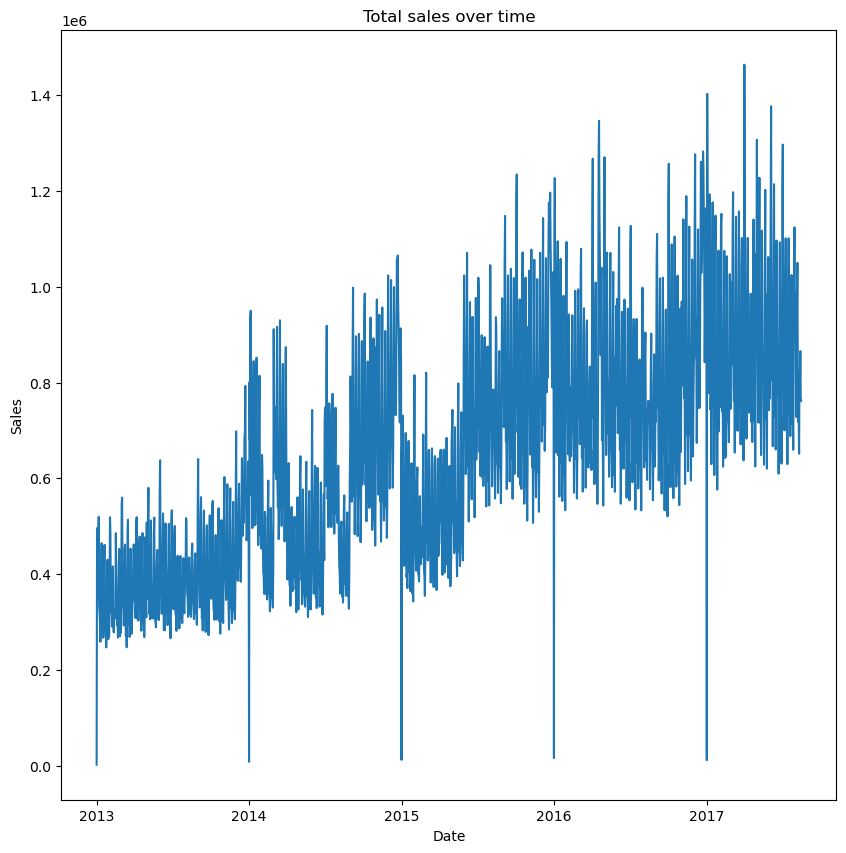

In [53]:
plt.figure(figsize = (10,10))
plt.plot(sales_by_date)
plt.title('Total sales over time')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# The above graph shows the Total sales per date and this shows that there is seasonality in data because we see some spikes in the graph on specific dates. We will have to do some Exploratory data analysis to flatten this data and make this data usable for training.

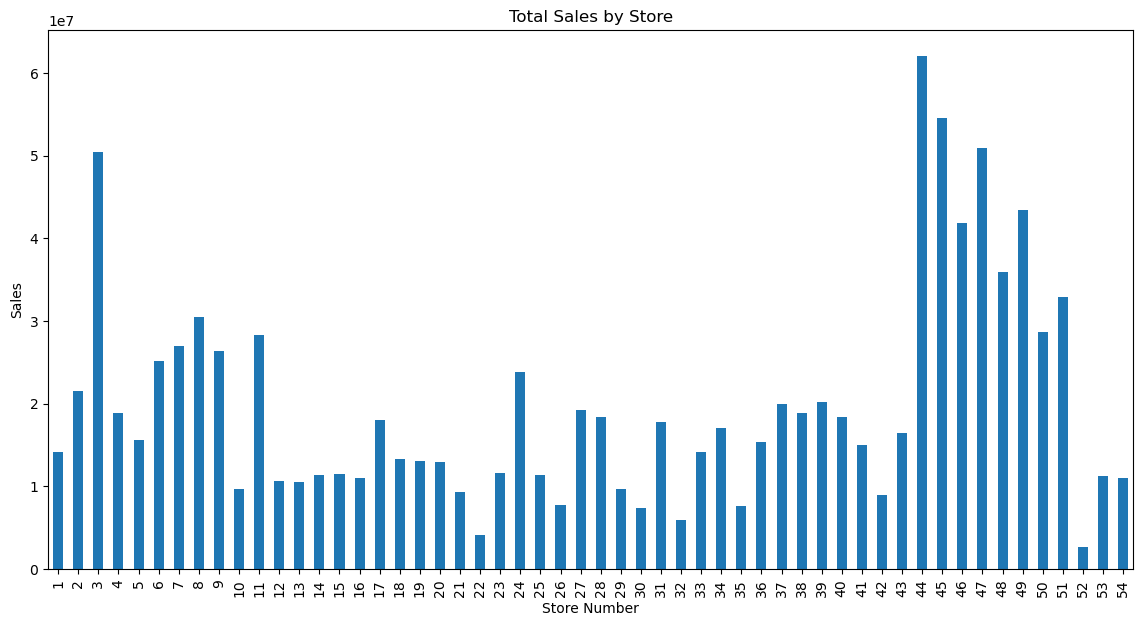

In [57]:
sales_by_store = df_train.groupby('store_nbr').sales.sum()

plt.figure(figsize=(14, 7))
sales_by_store.plot(kind='bar')
plt.title('Total Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Sales')
plt.show()

# The above plot shows the store sales per store number . This shows that store # 44 has the highest sales.

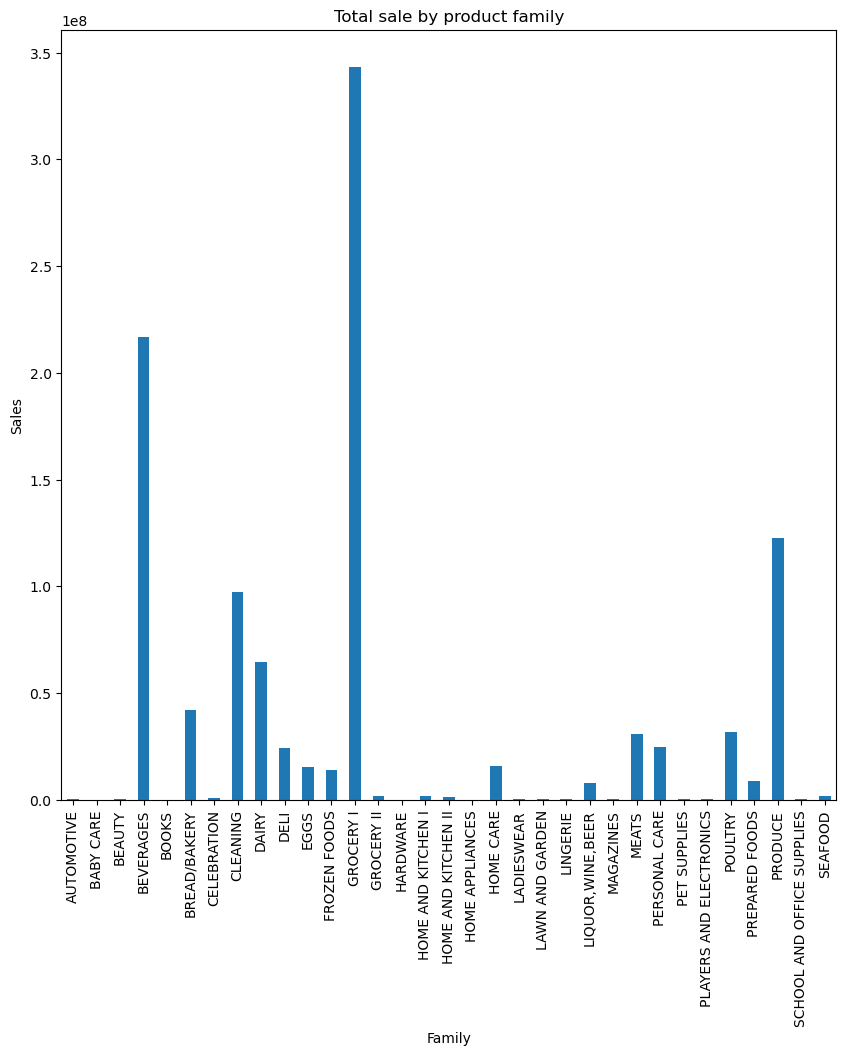

In [63]:
sales_by_family = df_train.groupby('family').sales.sum()

plt.figure(figsize=(10,10))
sales_by_family.plot(kind='bar')
plt.title("Total sale by product family")
plt.xlabel("Family")
plt.ylabel("Sales")
plt.show()

# From the Family vs sales graph we see that Product family Grocery 1 has the hights sales.

In [67]:
# Explore the holidays data
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

In [68]:
train_holidays = pd.merge(df_train, df_holidays , on = 'date' , how = 'left')

In [76]:
train_holidays['type'].notna().sum()

502524